In [1]:
import csv
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# QUESTION 1: DATA CURATION
# Open the file in write mode
with open('ice.csv', 'r') as infile, open('hw5.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    # Write the header row (optional)
    writer.writerow(['year', 'days'])

    # Write data rows
    dupes = []
    for row in reader:
        year = row[0][0:4]
        if year.isnumeric() and int(year) >= 1855 and int(year) <= 2022 and year not in dupes:
            dupes.append(year)
            writer.writerow([year, row[3]])

# reading in data
#filename = sys.argv[1]
#learning_rate = float(sys.argv[2])
#iterations = int(sys.argv[3])

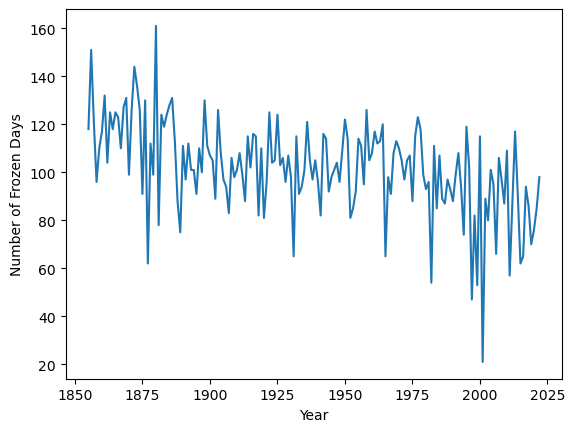

In [3]:
# QUESTION 2: VISUALIZE DATA
fig, ax = plt.subplots()
data = pd.read_csv("hw5.csv")
plt.plot(data.year, data.days)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Frozen Days")
plt.savefig("data_plot.jpg")

In [8]:
# QUESTION 3: DATA NORMALIZATION
def q3():
    data = pd.read_csv("hw5.csv")
    n = len(data)
    m = min(data.year)
    M = max(data.year)

    x_matrix = []

    for xi in range(n):
        year = data.loc[xi, "year"]
        x_matrix.append(np.array([(year - m) / (M - m), 1]).T)
    x_matrix = np.array(x_matrix)
    return x_matrix

In [9]:
# QUESTION 4: CLOSED-FORM SOLUTION TO LINEAR REGRESSION
data = pd.read_csv("hw5.csv")
Y = data.days
X = q3()
xtx = np.matmul(X.T, X)
inverse_xtx = np.linalg.inv(xtx)

weights = np.matmul(inverse_xtx, np.matmul(X.T, Y))
weights

array([-32.44864751, 118.1469428 ])

[0. 0.]
[26.32707504 60.6905683 ]
[29.85874782 78.07794303]
[27.72460751 84.19057626]
[24.32655519 87.29165676]
[20.78657199 89.51797045]
[17.38199865 91.42667141]
[14.17322067 93.16732406]
[11.16541623 94.78404511]
[ 8.35020345 96.29341097]


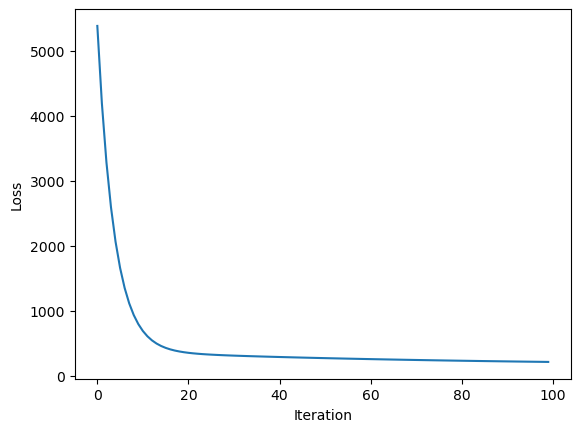

In [10]:
# QUESTION 5: LINEAR REGRESSION WITH GRADIENT DESCENT
n = len(data.days)
a = 0.1
T = 100
X = q3()
y = data.days
wb = np.zeros(X.shape[1])
loss_v_iteration = {}
for t in range(T):
    if t % 10 == 0:
        print(wb)
    y_i_hat = X.dot(wb)
    gradient = (1 / n) * (np.dot(np.transpose(X), np.subtract(y_i_hat, y)))
    wb -= a * gradient
    loss_v_iteration[t] = (1 / (2 * n)) * np.sum((y_i_hat - y) ** 2)

# plotting
fig, ax = plt.subplots()
data = pd.read_csv("hw5.csv")
plt.plot(loss_v_iteration.keys(), loss_v_iteration.values())
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
plt.savefig("loss_plot.jpg")

In [340]:
# QUESTION 6: PREDICTION
w = weights[0]
b = weights[1]
data = pd.read_csv("toy.csv")
m = min(data.year)
M = max(data.year)
x = 2023
y_hat = w*((x - m)/(M - m)) + b
y_hat

-2206.333333333336

In [341]:
# QUESTION 7: MODEL INTERPRETATION
symbol = None
if w > 0:
    symbol = ">"
elif w < 0:
    symbol = "<"
else:
    symbol = "="
print("Q7a: " + symbol)
    
print("Q7b: If w > 0, there is a direct relationship between year and days of ice cover. This means that as the year increases, so does the number of days of ice cover. If w < 0, there is an inverse relationship between year and days of ice cover. This means that as the year increases, the number of days of ice cover is expected to decrease. If w = 0, then as the year increases, the number of days of ice cover is expected to stay the same.")

Q7a: <
Q7b: If w > 0, there is a direct relationship between year and days of ice cover. This means that as the year increases, so does the number of days of ice cover. If w < 0, there is an inverse relationship between year and days of ice cover. This means that as the year increases, the number of days of ice cover is expected to decrease. If w = 0, then as the year increases, the number of days of ice cover is expected to stay the same.


In [342]:
# QUESTION 8: MODEL LIMITATIONS
x_star = (-b / w) * (M - m) + m
print("Q8a: " + str(x_star))
print("Q8b: This is a relatively compelling prediction. It says that Lake Mendota will continue freezing over until the year 2463, which is about 400 years from now. With the current rate of global warming, this is not completely out of the question. One limitation that may cause this prediction to be inaccurate is the lack of multiple features. We are only using the year to predict the days of ice cover, so the data might not be completely accurate. Furthermore, there may be some outlier years that have unusually high or low values for days of ice cover, leading to inaccurate predictions.")


Q8a: 1812.873015873016
Q8b: This is a relatively compelling prediction. It says that Lake Mendota will continue freezing over until the year 2463, which is about 400 years from now. With the current rate of global warming, this is not completely out of the question. One limitation that may cause this prediction to be inaccurate is the lack of multiple features. We are only using the year to predict the days of ice cover, so the data might not be completely accurate. Furthermore, there may be some outlier years that have unusually high or low values for days of ice cover, leading to inaccurate predictions.
